# Video Surveillance: Building an Object Tracker 
    
Using your laptop/desktop webcam, create a video of a moving object having a
distant colour with respect to the background.

a) Implement a mean-shift tracking algorithm for this particular object.

b) Try to see the output of the algorithm on rotating the object and changing the
distance of the object from the camera.

In [5]:
import cv2 as cv

import numpy as np

import matplotlib.pyplot as plt

In [7]:
video = cv.VideoCapture('Object_Tracking-3.mp4')

_,first_frame = video.read()

# Object position is used which will be tracked 

x = 525
y = 280

width = 175
height = 500

roi = first_frame[y : y+height ,x :x+width]

#Back Projection to be used - We will be calculating HSV Histogram

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

roi_hist = cv.calcHist([hsv_roi], [0], None, [180], [0, 180])


roi_hist = cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)

term_crit =(cv.TERM_CRITERIA_COUNT | cv.TERM_CRITERIA_EPS,10,1)

while True:
    isTrue,frame = video.read()
    
    hsv = cv.cvtColor(frame,cv.COLOR_BGR2HSV)
    
    mask = cv.calcBackProject([hsv], [0,1], roi_hist, [0, 180, 0, 256], 1)
    
    _,window = cv.meanShift(mask, (x, y, width, height), term_crit)
    
    x,y,w,h =window
    

    
    cv.rectangle(frame,(x,y),(x + w,y + h),(0,255,0),2)
    
    
    cv.imshow('First Frame',first_frame)
#    cv.imshow('Object',roi)
    cv.imshow('Video',frame)
     
#    cv.imshow('Video',mask)
    
    if cv.waitKey(20) & 0xFF == ord('d'):
        break

video.release()
cv.destroyAllWindows()

# To get the Position of the Object to be tracked

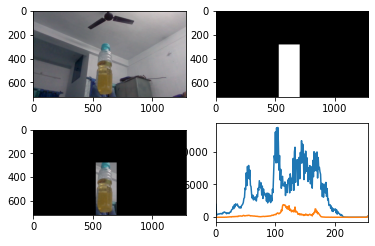

In [3]:
# create a mask
mask = np.zeros(first_frame.shape[:2], np.uint8)

mask[280:780, 525:700] = 10
masked_img = cv.bitwise_and(first_frame,first_frame,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([first_frame],[0],None,[256],[0,256])
hist_mask = cv.calcHist([first_frame],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(first_frame, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()